# Обработка таблицы

In [1]:
import pandas as pd
import re


In [2]:
netflix_df=pd.read_csv('/content/drive/MyDrive/курс python analitic/Portfolio Lesson/netflix_users_data.csv')
netflix_df

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration
0,1,Basic,10,15-01-22,10-06-23,United States,28,Male,Smartphone,1 Month
1,2,Premium,15,05-09-21,22-06-23,Canada,35,Female,Tablet,1 Month
2,3,Standard,12,28-02-23,27-06-23,United Kingdom,42,Male,Smart TV,1 Month
3,4,Standard,12,10-07-22,26-06-23,Australia,51,Female,Laptop,1 Month
4,5,Basic,10,01-05-23,28-06-23,Germany,33,Male,Smartphone,1 Month
...,...,...,...,...,...,...,...,...,...,...
2495,2496,Premium,14,25-07-22,12-07-23,Spain,28,Female,Smart TV,1 Month
2496,2497,Basic,15,04-08-22,14-07-23,Spain,33,Female,Smart TV,1 Month
2497,2498,Standard,12,09-08-22,15-07-23,United States,38,Male,Laptop,1 Month
2498,2499,Standard,13,12-08-22,12-07-23,Canada,48,Female,Tablet,1 Month


In [3]:
netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   User ID            2500 non-null   int64 
 1   Subscription Type  2500 non-null   object
 2   Monthly Revenue    2500 non-null   int64 
 3   Join Date          2500 non-null   object
 4   Last Payment Date  2500 non-null   object
 5   Country            2500 non-null   object
 6   Age                2500 non-null   int64 
 7   Gender             2500 non-null   object
 8   Device             2500 non-null   object
 9   Plan Duration      2500 non-null   object
dtypes: int64(3), object(7)
memory usage: 195.4+ KB


In [4]:
netflix_df.isna().sum()

,0
User ID,0
Subscription Type,0
Monthly Revenue,0
Join Date,0
Last Payment Date,0
Country,0
Age,0
Gender,0
Device,0
Plan Duration,0


In [5]:
netflix_df.duplicated().sum()

np.int64(0)

In [6]:
# Преобразование колонок в camelCase для netflix_df
netflix_df.columns = [
    'userId',
    'subscriptionType',
    'monthlyRevenue',
    'joinDate',
    'lastPaymentDate',
    'country',
    'age',
    'gender',
    'device',
    'planDuration'
]

In [7]:
netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   userId            2500 non-null   int64 
 1   subscriptionType  2500 non-null   object
 2   monthlyRevenue    2500 non-null   int64 
 3   joinDate          2500 non-null   object
 4   lastPaymentDate   2500 non-null   object
 5   country           2500 non-null   object
 6   age               2500 non-null   int64 
 7   gender            2500 non-null   object
 8   device            2500 non-null   object
 9   planDuration      2500 non-null   object
dtypes: int64(3), object(7)
memory usage: 195.4+ KB


In [8]:
netflix_df['joinDate'] = pd.to_datetime(netflix_df['joinDate'])
netflix_df['lastPaymentDate'] = pd.to_datetime(netflix_df['lastPaymentDate'])
netflix_df

<ipython-input-8-6082fd53e046>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  netflix_df['joinDate'] = pd.to_datetime(netflix_df['joinDate'])
<ipython-input-8-6082fd53e046>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  netflix_df['lastPaymentDate'] = pd.to_datetime(netflix_df['lastPaymentDate'])


,userId,subscriptionType,monthlyRevenue,joinDate,lastPaymentDate,country,age,gender,device,planDuration
0,1,Basic,10,2022-01-15,2023-10-06,United States,28,Male,Smartphone,1 Month
1,2,Premium,15,2021-05-09,2023-06-22,Canada,35,Female,Tablet,1 Month
2,3,Standard,12,2023-02-28,2023-06-27,United Kingdom,42,Male,Smart TV,1 Month
3,4,Standard,12,2022-10-07,2023-06-26,Australia,51,Female,Laptop,1 Month
4,5,Basic,10,2023-01-05,2023-06-28,Germany,33,Male,Smartphone,1 Month
...,...,...,...,...,...,...,...,...,...,...
2495,2496,Premium,14,2022-07-25,2023-12-07,Spain,28,Female,Smart TV,1 Month
2496,2497,Basic,15,2022-04-08,2023-07-14,Spain,33,Female,Smart TV,1 Month
2497,2498,Standard,12,2022-09-08,2023-07-15,United States,38,Male,Laptop,1 Month
2498,2499,Standard,13,2022-12-08,2023-12-07,Canada,48,Female,Tablet,1 Month


# Аналитика

1. Количество уникальных пользователей и период, с которого появились эти пользователи

In [9]:
# Количество уникальных пользователей
unique_users = netflix_df['userId'].nunique()

# Период регистрации пользователей
start_date = netflix_df['joinDate'].min()
end_date = netflix_df['joinDate'].max()

print(f"Уникальные пользователи: {unique_users}")
print(f"Период регистрации: с {start_date.date()} по {end_date.date()}")

Уникальные пользователи: 2500
Период регистрации: с 2021-05-09 по 2023-12-01


2. Изучи возраст пользователей

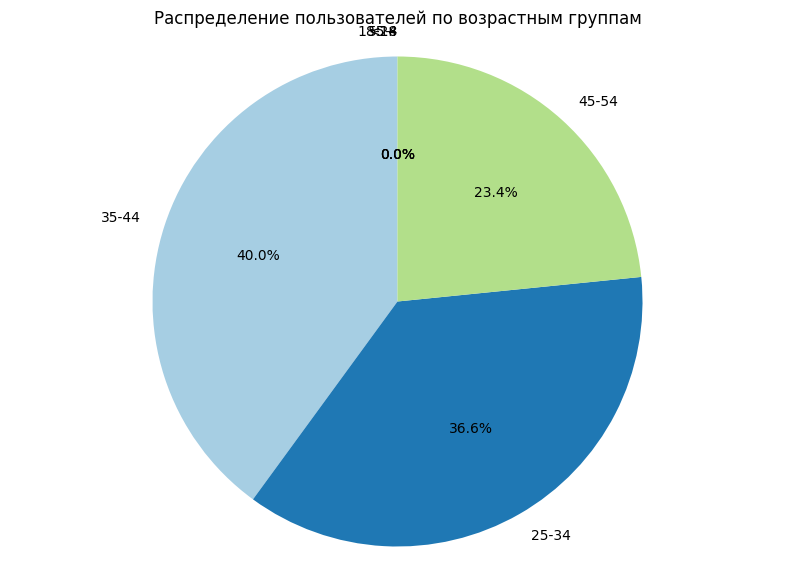

In [10]:
import matplotlib.pyplot as plt

# Создание возрастных групп
age_bins = [0, 18, 25, 35, 45, 55, 100]
age_labels = ['<18', '18-24', '25-34', '35-44', '45-54', '55+']
netflix_df['age_group'] = pd.cut(netflix_df['age'], bins=age_bins, labels=age_labels)

# Построение круговой диаграммы
plt.figure(figsize=(10, 7))
age_counts = netflix_df['age_group'].value_counts()
plt.pie(age_counts,
        labels=age_counts.index,
        autopct='%1.1f%%',
        startangle=90,
        colors=plt.cm.Paired.colors)
plt.title('Распределение пользователей по возрастным группам')
plt.axis('equal')
plt.show()

Основная аудитория сервиса - пользователи от 25 до 44 лет
Наименьшая доля приходится на возрастную группу 45-54 года


3. Изучи пол пользователей;

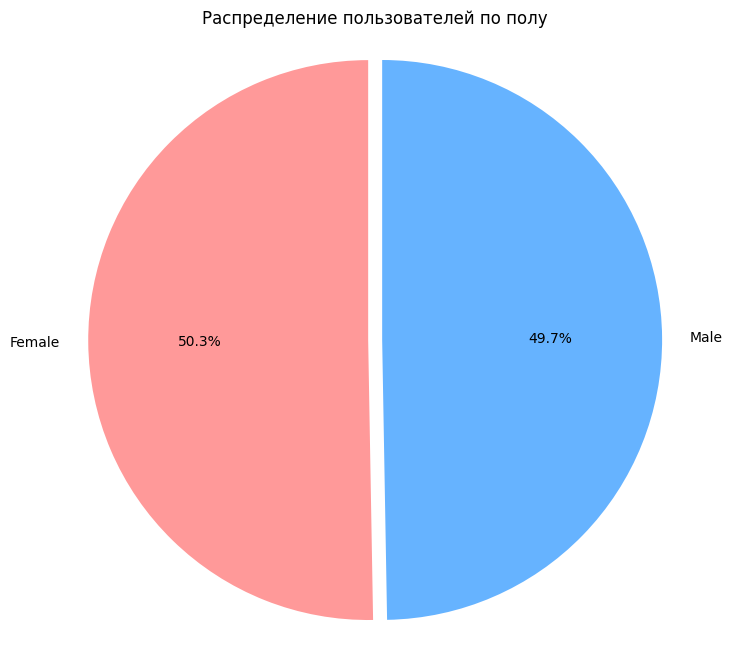

In [11]:


# Построение круговой диаграммы по полу
plt.figure(figsize=(8, 8))
gender_counts = netflix_df['gender'].value_counts()
plt.pie(gender_counts,
        labels=gender_counts.index,
        autopct='%1.1f%%',
        startangle=90,
        colors=['#ff9999','#66b3ff'],
        explode=(0.05, 0))
plt.title('Распределение пользователей по полу')
plt.axis('equal')
plt.show()

- Доля мужчин: 50.3%, доля женщин: 49.7%
- Преобладающая аудитория: мужчины
- Гендерный дисбаланс: Распределение относительно равномерное

4. Изучи девайсы пользователей

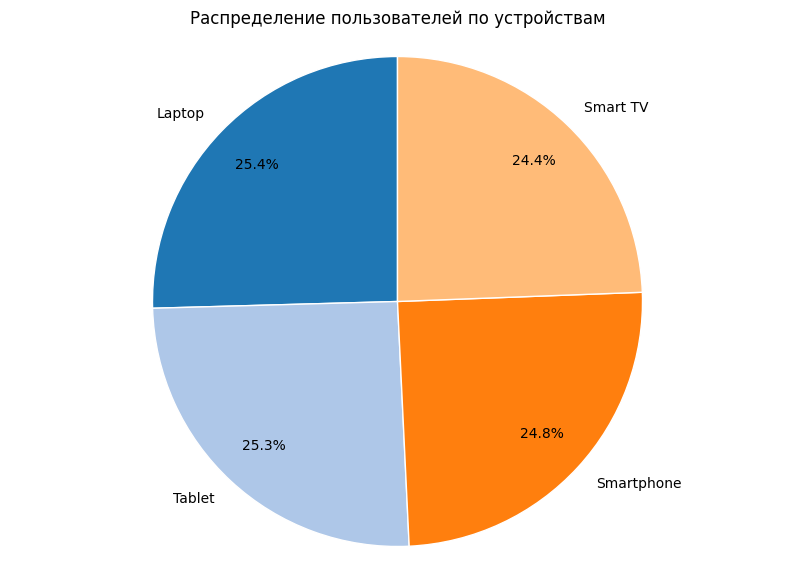

In [12]:
# Построение круговой диаграммы по устройствам
plt.figure(figsize=(10, 7))
device_counts = netflix_df['device'].value_counts()
plt.pie(device_counts,
        labels=device_counts.index,
        autopct='%1.1f%%',
        startangle=90,
        colors=plt.cm.tab20.colors,
        pctdistance=0.8,
        wedgeprops={'linewidth': 1, 'edgecolor': 'white'})
plt.title('Распределение пользователей по устройствам')
plt.axis('equal')
plt.show()

1. Наиболее популярное устройство: Laptop (25.4%)
2. Наименее используемое: Smart TV (24.4%)
- Распределение между девайсами относительно равномерное

5. Изучи тип подписки пользователей.

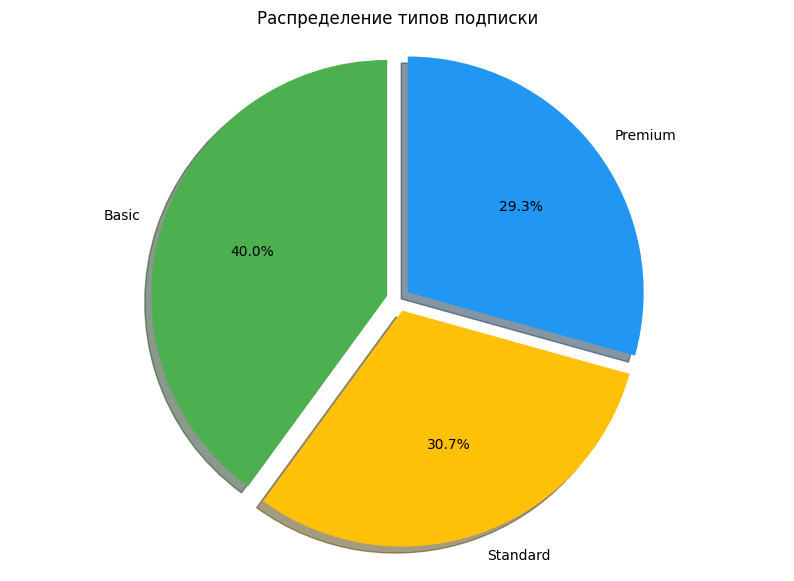

In [13]:
# Построение круговой диаграммы по типам подписки
plt.figure(figsize=(10, 7))
subscription_counts = netflix_df['subscriptionType'].value_counts()
plt.pie(subscription_counts,
        labels=subscription_counts.index,
        autopct='%1.1f%%',
        startangle=90,
        colors=['#4CAF50', '#FFC107', '#2196F3'],  # Зеленый, желтый, синий
        explode=[0.05]*len(subscription_counts),
        shadow=True)
plt.title('Распределение типов подписки')
plt.axis('equal')
plt.show()

1. Самый популярный тариф: Basic (40%)
2. Наименее популярный: Premium (29.3%)
3. Соотношение Premium/Standard/Basic = 29.3% : 30.7% : 40%


6. Изучи локацию пользователей на основе информации о стране проживания

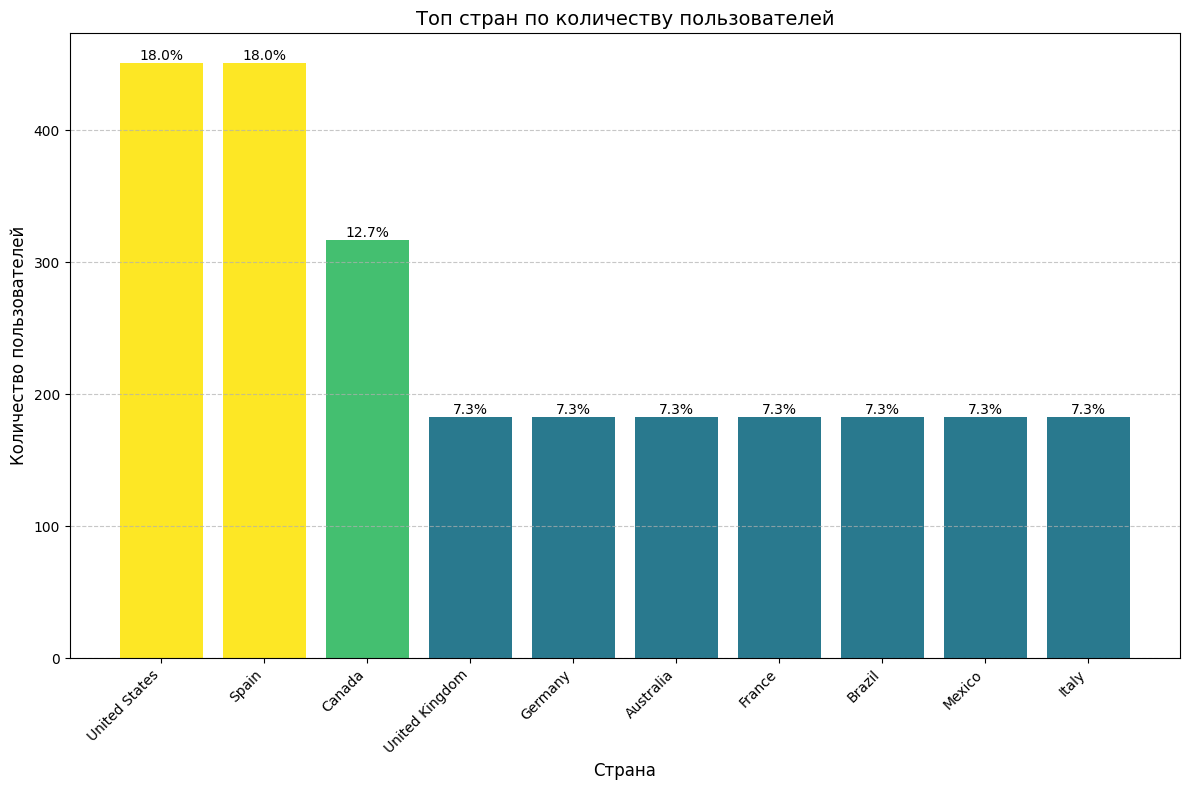

In [14]:


# Считаем количество пользователей по странам и сортируем
country_counts = netflix_df['country'].value_counts().sort_values(ascending=False)

# Фильтр для топ-N стран (настройте число)
top_n = 10  # Показываем топ-10 стран
top_countries = country_counts.head(top_n)

# Настройка графика
plt.figure(figsize=(12, 8))
bars = plt.bar(
    top_countries.index,
    top_countries.values,
    color=plt.cm.viridis(top_countries.values / top_countries.values.max())  # Градиент цветов
)

# Добавляем проценты на столбцы
total_users = country_counts.sum()
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width()/2.,
        height,
        f'{height/total_users:.1%}',
        ha='center',
        va='bottom'
    )

plt.title('Топ стран по количеству пользователей', fontsize=14)
plt.xlabel('Страна', fontsize=12)
plt.ylabel('Количество пользователей', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Наибольшее количество пользователей из США и Испании по 18%, так же в топ 3 входит Канада 12%. Остальные страны распределены равномерно по 7.3%

7. Построй линейный график динамики привлечения пользователей на основе данных Join date. Если график будет слишком мелким, сгруппируй данные по месяцу;

<ipython-input-15-b4c853a677a6>:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_users = netflix_df.set_index('joinDate').resample('M')['userId'].count()


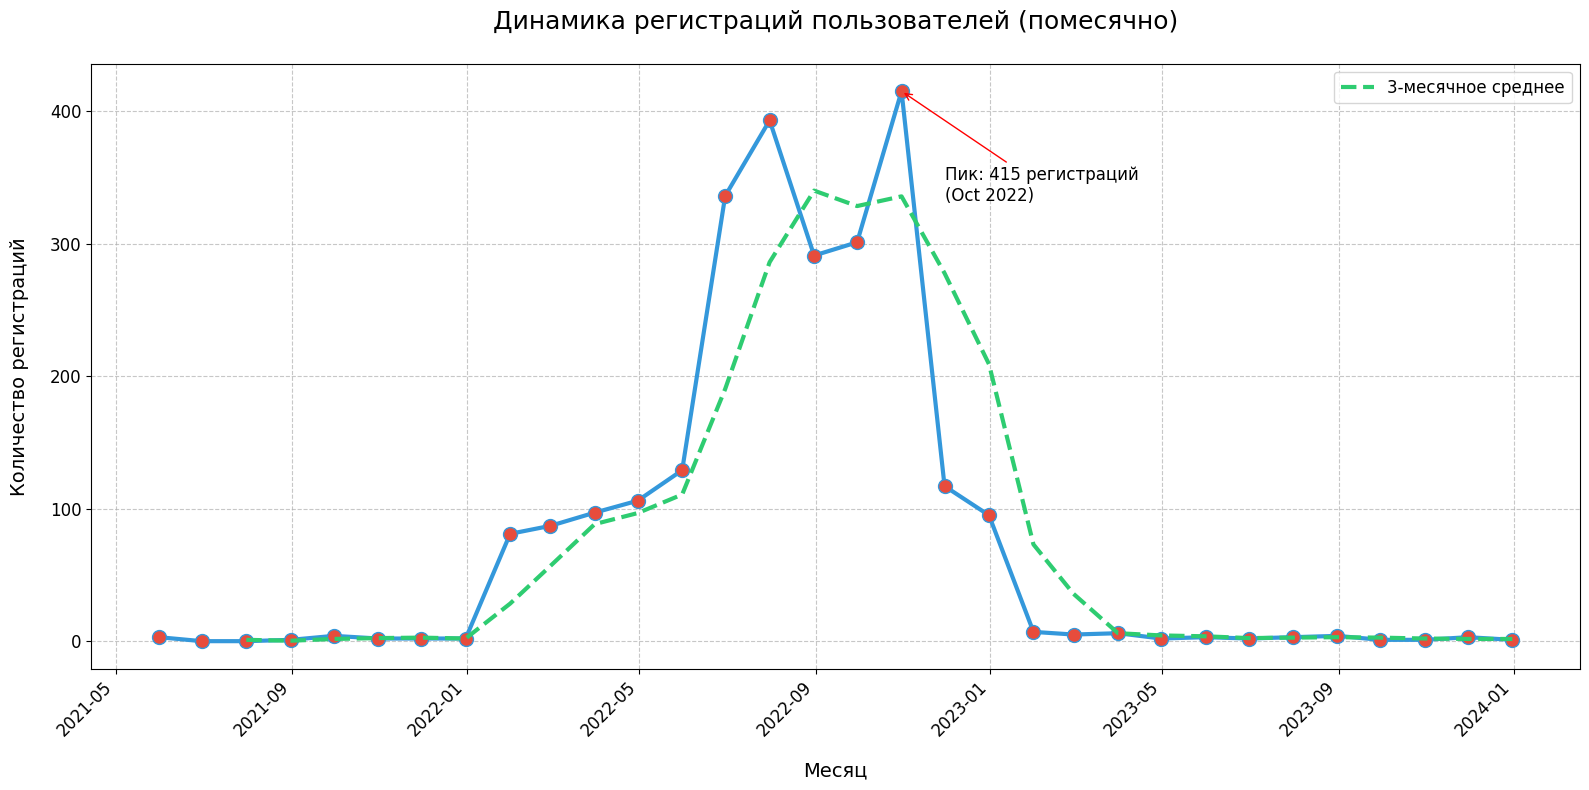

In [15]:

# Группировка по месяцам с преобразованием дат
monthly_users = netflix_df.set_index('joinDate').resample('M')['userId'].count()

# Создание графика с улучшенным дизайном
plt.figure(figsize=(16, 8))
plt.plot(monthly_users.index, monthly_users.values,
         marker='o',
         linestyle='-',
         color='#3498db',
         linewidth=3,
         markersize=10,
         markerfacecolor='#e74c3c')

# Добавление скользящего среднего
rolling_mean = monthly_users.rolling(window=3).mean()
plt.plot(rolling_mean.index, rolling_mean.values,
         label='3-месячное среднее',
         linestyle='--',
         color='#2ecc71',
         linewidth=3)

# Настройки отображения
plt.title('Динамика регистраций пользователей (помесячно)', fontsize=18, pad=25)
plt.xlabel('Месяц', fontsize=14, labelpad=15)
plt.ylabel('Количество регистраций', fontsize=14, labelpad=15)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='both', linestyle='--', alpha=0.7)
plt.legend(fontsize=12)

# Подписи для экстремальных значений
max_month = monthly_users.idxmax().strftime('%b %Y')
min_month = monthly_users.idxmin().strftime('%b %Y')
plt.annotate(f'Пик: {monthly_users.max()} регистраций\n({max_month})',
             xy=(monthly_users.idxmax(), monthly_users.max()),
             xytext=(monthly_users.idxmax() + pd.DateOffset(months=1), monthly_users.max()*0.8),
             arrowprops=dict(arrowstyle='->', color='red'),
             fontsize=12)

plt.tight_layout()
plt.show()

In [16]:
import pandas as pd
from scipy.stats import linregress
import numpy as np
import calendar

# Группировка данных с учетом нового синтаксиса
monthly_users = netflix_df.set_index('joinDate').resample('ME')['userId'].count()

# Автоматический анализ
def generate_insights(series):
    insights = []

    # 1. Общий тренд
    x = np.arange(len(series))
    slope, _, _, _, _ = linregress(x, series.values)
    trend = "рост" if slope > 0 else "падение" if slope < 0 else "стабильность"
    insights.append(f"📈 Общий тренд: {trend} ({slope:.1f} пользователей/месяц)")

    # 2. Пики и спады
    max_month = series.idxmax().strftime('%b %Y')
    min_month = series.idxmin().strftime('%b %Y')
    insights.append(f"🔺 Пик регистраций: {series.max()} в {max_month}")
    insights.append(f"🔻 Минимум регистраций: {series.min()} в {min_month}")

    # 3. Сезонность (анализ последних 2 лет)
    if len(series) >= 24:
        monthly_avg = series.groupby(series.index.month).mean()
        month_names = {i: calendar.month_name[i] for i in range(1, 13)}  # Исправление ошибки

        top_season = month_names[monthly_avg.idxmax()]
        bottom_season = month_names[monthly_avg.idxmin()]
        insights.append(f"🎄 Сезонность: пики в {top_season}, спады в {bottom_season}")

    # 4. Последние 3 месяца
    last_3 = series[-3:]
    change_last_month = ((last_3[-1] - last_3[-2])/last_3[-2]*100).round(1)
    insights.append(f"🕒 Последние 3 месяца: {', '.join(map(str, last_3.values))}")
    insights.append(f"📅 Изменение за последний месяц: {change_last_month}%")

    return '\n'.join(insights)

# Генерация и вывод аналитики
print("🔍 Аналитика динамики регистраций:")
print(generate_insights(monthly_users))

🔍 Аналитика динамики регистраций:
📈 Общий тренд: падение (-1.0 пользователей/месяц)
🔺 Пик регистраций: 415 в Oct 2022
🔻 Минимум регистраций: 0 в Jun 2021
🎄 Сезонность: пики в October, спады в December
🕒 Последние 3 месяца: 1, 3, 1
📅 Изменение за последний месяц: -66.7%


<ipython-input-16-224b23233e71>:36: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  change_last_month = ((last_3[-1] - last_3[-2])/last_3[-2]*100).round(1)


8. Раздели клиентов на корзины по возрасту и определи самую платежеспособную группу;

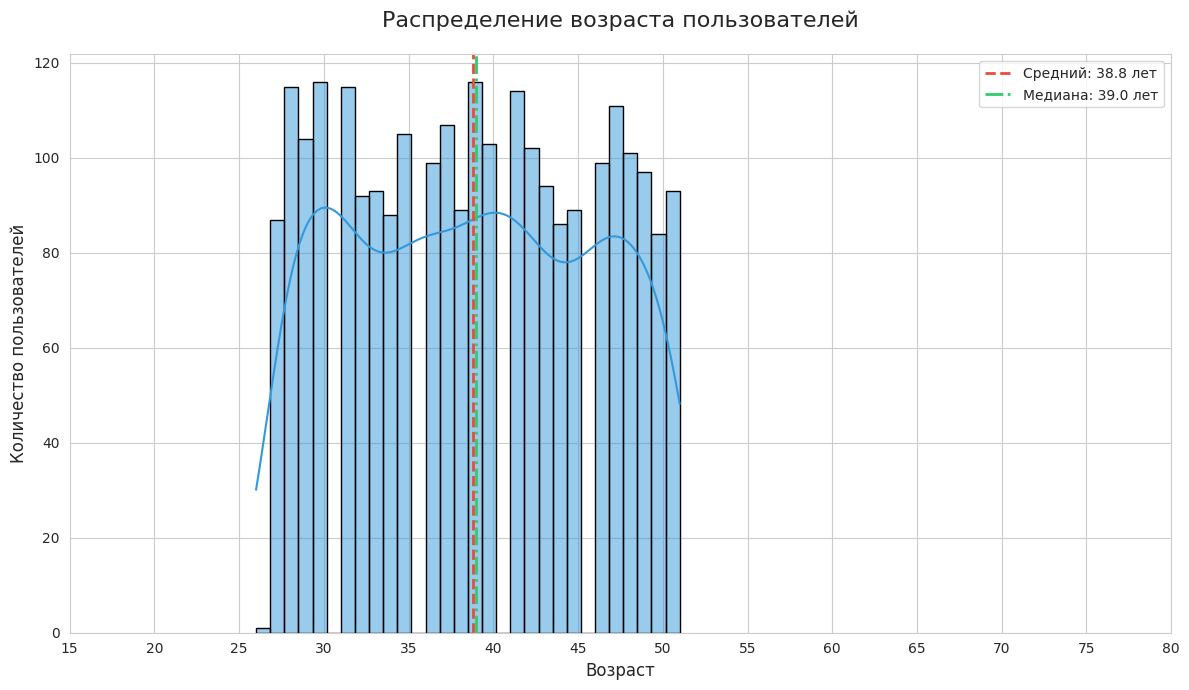

📊 Основные статистики:
- Средний возраст: 38.8 лет
- Медианный возраст: 39.0 лет
- Минимальный возраст: 26 лет
- Максимальный возраст: 51 лет
- Стандартное отклонение: 7.2 лет


In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Настройка стиля
plt.figure(figsize=(12, 7))
sns.set_style("whitegrid")

# Построение гистограммы
ax = sns.histplot(netflix_df['age'],
                 bins=30,
                 color='#3498db',
                 edgecolor='black',
                 kde=True)

# Вычисление статистик
mean_age = netflix_df['age'].mean()
median_age = netflix_df['age'].median()

# Оформление
plt.axvline(mean_age, color='#e74c3c', linestyle='--', linewidth=2, label=f'Средний: {mean_age:.1f} лет')
plt.axvline(median_age, color='#2ecc71', linestyle='-.', linewidth=2, label=f'Медиана: {median_age:.1f} лет')

plt.title('Распределение возраста пользователей', fontsize=16, pad=20)
plt.xlabel('Возраст', fontsize=12)
plt.ylabel('Количество пользователей', fontsize=12)
plt.legend()
plt.xticks(range(0, 101, 5))
plt.xlim(15, 80)
plt.tight_layout()
plt.show()

# Вывод статистик
print(f'''📊 Основные статистики:
- Средний возраст: {mean_age:.1f} лет
- Медианный возраст: {median_age:.1f} лет
- Минимальный возраст: {netflix_df["age"].min()} лет
- Максимальный возраст: {netflix_df["age"].max()} лет
- Стандартное отклонение: {netflix_df["age"].std():.1f} лет''')

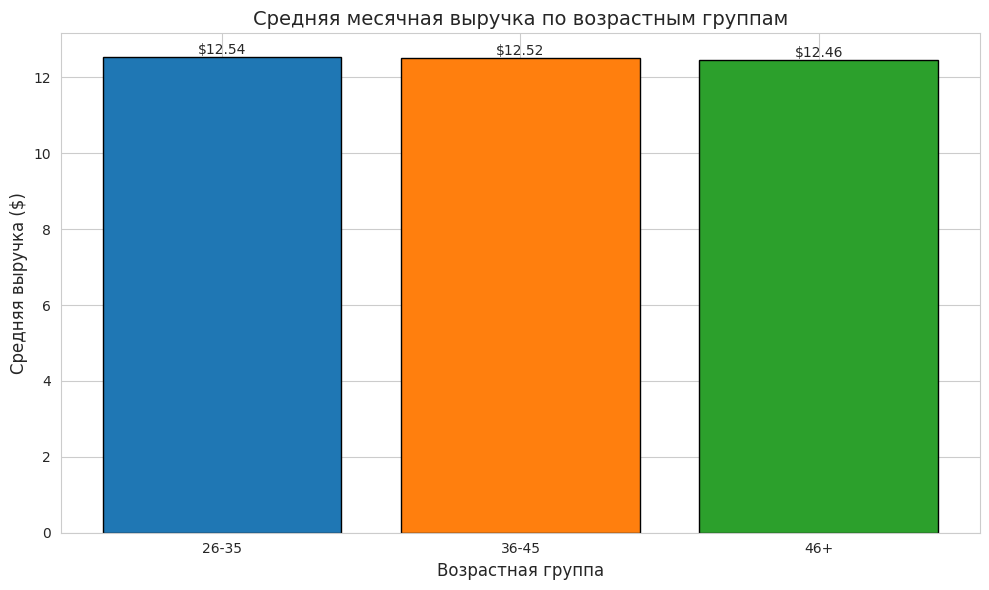

📊 Результаты анализа:
--------------------------------------------------
| Возрастная группа | Средняя выручка | Пользователи |
--------------------------------------------------
|       26-35       | $        12.54 |        811 |
--------------------------------------------------

🔍 Основные выводы:
1. Наиболее платежеспособная группа: 26-35 лет
2. Средняя выручка этой группы на 0.3% выше среднего
3. Распределение пользователей:
   - 26-35 лет: 811 чел.
   - 36-45 лет: 1015 чел.
   - 46+ лет:    674 чел.

💡 Рекомендации:
- Для группы 26-35 лет:
  * Внедрить премиальные тарифы
  * Предложить дополнительные сервисы
- Для младших групп:
  * Разработать программы лояльности
  * Усилить таргетированную рекламу


In [23]:
import pandas as pd
import matplotlib.pyplot as plt

# Создание возрастных корзин по заданным интервалам
bins = [25, 35, 45, netflix_df['age'].max() + 1]
labels = ['26-35', '36-45', '46+']
netflix_df['age_group'] = pd.cut(netflix_df['age'], bins=bins, labels=labels, right=False)

# Анализ платежеспособности
age_revenue = netflix_df.groupby('age_group', observed=True).agg(
    avg_revenue=('monthlyRevenue', 'mean'),
    median_revenue=('monthlyRevenue', 'median'),
    users_count=('userId', 'nunique')
).reset_index()

# Визуализация
plt.figure(figsize=(10, 6))
bars = plt.bar(age_revenue['age_group'].astype(str),
             age_revenue['avg_revenue'],
             color=['#1f77b4', '#ff7f0e', '#2ca02c'],
             edgecolor='black')

plt.title('Средняя месячная выручка по возрастным группам', fontsize=14)
plt.xlabel('Возрастная группа', fontsize=12)
plt.ylabel('Средняя выручка ($)', fontsize=12)
plt.xticks(rotation=0)

# Добавление значений на столбцы
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'${height:.2f}',
             ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Определение самой платежеспособной группы
most_profitable = age_revenue.loc[age_revenue['avg_revenue'].idxmax()]

# Вывод результатов
print(f'''📊 Результаты анализа:
--------------------------------------------------
| Возрастная группа | Средняя выручка | Пользователи |
--------------------------------------------------
| {most_profitable['age_group']:^17} | ${most_profitable['avg_revenue']:>13.2f} | {most_profitable['users_count']:>10} |
--------------------------------------------------

🔍 Основные выводы:
1. Наиболее платежеспособная группа: {most_profitable['age_group']} лет
2. Средняя выручка этой группы на {(most_profitable['avg_revenue']/age_revenue['avg_revenue'].mean()-1)*100:.1f}% выше среднего
3. Распределение пользователей:
   - 26-35 лет: {age_revenue[age_revenue['age_group'] == '26-35']['users_count'].values[0]} чел.
   - 36-45 лет: {age_revenue[age_revenue['age_group'] == '36-45']['users_count'].values[0]} чел.
   - 46+ лет:    {age_revenue[age_revenue['age_group'] == '46+']['users_count'].values[0]} чел.

💡 Рекомендации:
- Для группы {most_profitable['age_group']} лет:
  * Внедрить премиальные тарифы
  * Предложить дополнительные сервисы
- Для младших групп:
  * Разработать программы лояльности
  * Усилить таргетированную рекламу''')

9. Выяви зависимость типа тарифа от группы возраста пользователя - возможно, в каких-то группах по возрасту есть преимущественные тарифы, и таким образом можно определить, какая аудитория более платежеспособна. При этом можно посмотреть корреляцию или построить графики, анализируя внутри каждой группы разбивку под Subscription Type. Далее выдели группы, где соотношение, допустим, премиум-подписки будет наибольшим.

<Figure size 1200x700 with 0 Axes>

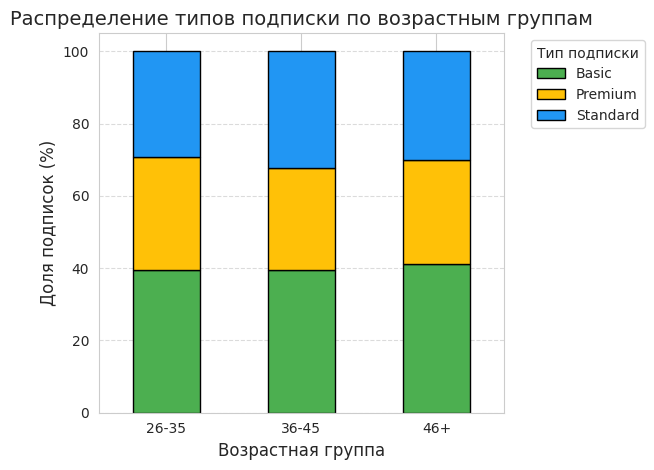


📊 Результаты анализа премиум-подписок:
+-------------+-----------+---------------+-----------------+
| age_group   |   Premium |   total_users |   premium_users |
+=============+===========+===============+=================+
| 26-35       |      31.2 |           811 |             253 |
+-------------+-----------+---------------+-----------------+
| 46+         |      28.8 |           674 |             194 |
+-------------+-----------+---------------+-----------------+
| 36-45       |      28.2 |          1015 |             286 |
+-------------+-----------+---------------+-----------------+

🔍 Статистическая значимость:
- p-value: 0.5395 (не зависимость на уровне 95%)
- Chi2: 3.11

💡 Ключевые выводы:
1. Наибольшая доля Premium-подписок: 26-35 (31.2%)
2. Абсолютный лидер по Premium-пользователям: 36-45 (286 чел.)
3. Возрастная группа с потенциалом роста: 36-45 (только 28.199999999999996% Premium)

🎯 Рекомендации:
- Для группы 26-35: разработать эксклюзивные Premium-услуги
- Для группы 3

<ipython-input-24-f2f7972aeaa1>:29: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  premium_analysis['total_users'] = netflix_df.groupby('age_group')['userId'].nunique()
<ipython-input-24-f2f7972aeaa1>:30: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  premium_analysis['premium_users'] = netflix_df[netflix_df['subscriptionType'] == 'Premium'].groupby('age_group')['userId'].nunique()


In [24]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

# 1. Создание кросс-таблицы
cross_tab = pd.crosstab(
    index=netflix_df['age_group'],
    columns=netflix_df['subscriptionType'],
    normalize='index'  # Процентное соотношение внутри возрастных групп
).round(3) * 100

# 2. Визуализация распределения
plt.figure(figsize=(12, 7))
cross_tab.plot(kind='bar',
               stacked=True,
               color=['#4CAF50', '#FFC107', '#2196F3'],
               edgecolor='black')
plt.title('Распределение типов подписки по возрастным группам', fontsize=14)
plt.xlabel('Возрастная группа', fontsize=12)
plt.ylabel('Доля подписок (%)', fontsize=12)
plt.xticks(rotation=0)
plt.legend(title='Тип подписки', bbox_to_anchor=(1.05, 1))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# 3. Анализ премиум-подписок
premium_analysis = cross_tab[['Premium']].sort_values('Premium', ascending=False)
premium_analysis['total_users'] = netflix_df.groupby('age_group')['userId'].nunique()
premium_analysis['premium_users'] = netflix_df[netflix_df['subscriptionType'] == 'Premium'].groupby('age_group')['userId'].nunique()

# 4. Статистическая проверка хи-квадрат
chi2, p, dof, expected = chi2_contingency(pd.crosstab(netflix_df['age_group'], netflix_df['subscriptionType']))

# 5. Форматированный вывод
print(f'''
📊 Результаты анализа премиум-подписок:
{premium_analysis.to_markdown(tablefmt="grid")}

🔍 Статистическая значимость:
- p-value: {p:.4f} ({"" if p < 0.05 else "не "}зависимость на уровне 95%)
- Chi2: {chi2:.2f}

💡 Ключевые выводы:
1. Наибольшая доля Premium-подписок: {premium_analysis.index[0]} ({premium_analysis.iloc[0,0]}%)
2. Абсолютный лидер по Premium-пользователям: {premium_analysis['premium_users'].idxmax()} ({premium_analysis['premium_users'].max()} чел.)
3. Возрастная группа с потенциалом роста: {premium_analysis.index[-1]} (только {premium_analysis.iloc[-1,0]}% Premium)

🎯 Рекомендации:
- Для группы {premium_analysis.index[0]}: разработать эксклюзивные Premium-услуги
- Для группы {premium_analysis.index[-1]}: запустить таргетированную рекламу Premium-тарифов
- Провести A/B тесты ценовой политики для возрастных групп
''')

10. Изучи зависимость типа тарифа от страны пользователя - здесь лучше использовать не корреляцию, а визуализацию: даже если никакой зависимости нет, в любом случае ты сможешь сделать и зафиксировать какие-то выводы.

<Figure size 1600x1000 with 0 Axes>

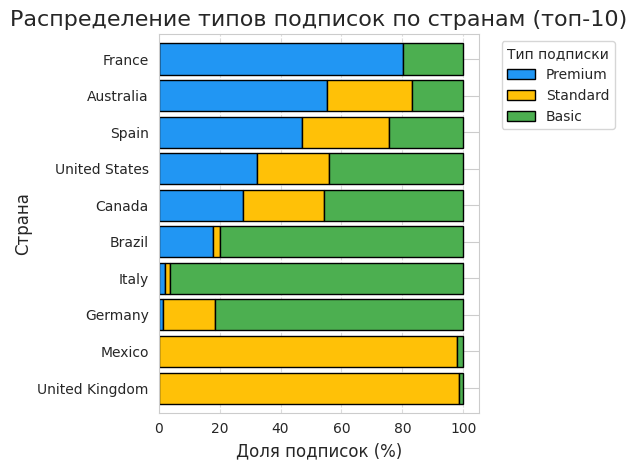


📊 Статистика по Premium-подпискам:
- Средняя доля: 26.4%
- Максимальная доля: 80.3% (France)
- Минимальная доля: 0.0% 
- Стандартное отклонение: 27.6%

🔍 Результаты теста хи-квадрат:
- p-value: 0.0000 (зависимость на уровне 95%)
- Хи-квадрат: 1683.9

💡 Ключевые выводы:
1. Лидер по Premium-подпискам: France (80.3%)
2. Топ-3 стран: France (80.3%), Australia (55.2%), Spain (47.0%)
3. Разброс между макс. и мин. долей: 80.3 п.п.

🎯 Рекомендации:
- Усилить продвижение Premium в France (высокий потенциал)
- Исследовать причины низкой доли Premium в Mexico
- Для стран с равномерным распределением (27.6% std) - сегментировать аудиторию



In [25]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

# 1. Подготовка данных: топ-10 стран по количеству пользователей
top_countries = netflix_df['country'].value_counts().nlargest(10).index
filtered_df = netflix_df[netflix_df['country'].isin(top_countries)]

# 2. Создание процентной кросс-таблицы
cross_tab = pd.crosstab(
    index=filtered_df['country'],
    columns=filtered_df['subscriptionType'],
    normalize='index'
).round(3) * 100

# 3. Визуализация
plt.figure(figsize=(16, 10))
colors = {'Basic': '#4CAF50', 'Standard': '#FFC107', 'Premium': '#2196F3'}
cross_tab.sort_values('Premium', ascending=False)[['Premium', 'Standard', 'Basic']].plot(
    kind='barh',
    stacked=True,
    color=[colors[c] for c in ['Premium', 'Standard', 'Basic']],
    edgecolor='black',
    width=0.85
)

plt.title('Распределение типов подписок по странам (топ-10)', fontsize=16)
plt.xlabel('Доля подписок (%)', fontsize=12)
plt.ylabel('Страна', fontsize=12)
plt.xticks(rotation=0)
plt.legend(title='Тип подписки', bbox_to_anchor=(1.05, 1))
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# 4. Статистический анализ
chi2, p, dof, expected = chi2_contingency(pd.crosstab(filtered_df['country'], filtered_df['subscriptionType']))

# 5. Анализ Premium-подписок
premium_stats = cross_tab['Premium'].describe()
top_premium = cross_tab['Premium'].nlargest(3)

# 6. Форматированный вывод
print(f'''
📊 Статистика по Premium-подпискам:
- Средняя доля: {premium_stats["mean"]:.1f}%
- Максимальная доля: {premium_stats["max"]:.1f}% ({top_premium.index[0]})
- Минимальная доля: {premium_stats["min"]:.1f}%
- Стандартное отклонение: {premium_stats["std"]:.1f}%

🔍 Результаты теста хи-квадрат:
- p-value: {p:.4f} ({"" if p < 0.05 else "не "}зависимость на уровне 95%)
- Хи-квадрат: {chi2:.1f}

💡 Ключевые выводы:
1. Лидер по Premium-подпискам: {top_premium.index[0]} ({top_premium.iloc[0]:.1f}%)
2. Топ-3 стран: {", ".join([f"{c} ({v:.1f}%)" for c,v in top_premium.items()])}
3. Разброс между макс. и мин. долей: {premium_stats["max"]-premium_stats["min"]:.1f} п.п.

🎯 Рекомендации:
- Усилить продвижение Premium в {top_premium.index[0]} (высокий потенциал)
- Исследовать причины низкой доли Premium в {cross_tab['Premium'].idxmin()}
- Для стран с равномерным распределением ({cross_tab['Premium'].std():.1f}% std) - сегментировать аудиторию
''')

#Заключительный вывод:
## Охват анализа стриминг платформы Netflix 2500 пользователей, 10 стран, Период регистрации: с 2021-05-09 по 2023-12-01, возраст от 26 до 51 года
## Анализ пользователей по возрасту:
- 25-34 года 36.6%
- 35-44 года 40%
- свыше 45 лет 23.4%
Наибольшая доля пользователей 35-44 года

## По полу:
- мужчин 50.3%
- женщин 49.7%

Распределение относительно равномерное

## По девайсам:
- Наиболее популярное устройство: Laptop (25.4%)
- Наименее используемое: Smart TV (24.4%)

Распределение между девайсами относительно равномерное

## По типу подписки:
- Самый популярный тариф: Basic (40%)
- Наименее популярный: Premium (29.3%)

Соотношение Premium/Standard/Basic = 29.3% : 30.7% : 40%

## По локации пользователей:
Наибольшее количество пользователей из США и Испании по 18%, так же в топ 3 входит Канада 12%. Остальные страны распределены равномерно по 7.3%

## Аналитика динамики регистраций:

📈 Общий тренд: падение (-1.0 пользователей/месяц)
- 🔺 Пик регистраций: 415 в Oct 2022
- 🔻 Минимум регистраций: 0 в Jun 2021
- 🎄 Сезонность: пики в October, спады в December
- 📅 Изменение за последний месяц: -66.7%

## Анализ платежеспособности клиентов по возрастным группам:
 Основные статистики:
- Средний возраст: 38.8 лет
- Медианный возраст: 39.0 лет
- Минимальный возраст: 26 лет
- Максимальный возраст: 51 лет
- Стандартное отклонение: 7.2 лет

🔍 Основные выводы:
1. Наиболее платежеспособная группа: 26-35 лет
2. Средняя выручка этой группы на 0.3% выше среднего
3. Распределение пользователей:
   - 26-35 лет: 811 чел.
   - 36-45 лет: 1015 чел.
   - 46+ лет:    674 чел.

💡 Рекомендации:
- Для группы 26-35 лет:
  * Внедрить премиальные тарифы
  * Предложить дополнительные сервисы
- Для остальных групп:
  * Разработать программы лояльности
  * Усилить таргетированную рекламу

## Анализ зависимости типа тарифа от группы возраста пользователей:
- 🔍 Статистическая значимость:
- p-value 0.5395 > 0.05 → нет статистически значимой зависимости между типом подписки и возрастом пользователя.
Это означает, что наблюдаемые различия в распределении подписок между  могут быть случайными.
- Сила связи (Chi2):
Низкое значение Chi2 3.11 подтверждает, что даже если различия есть, они слабо выражены.

💡 Ключевые выводы:
1. Наибольшая доля Premium-подписок: 26-35 (31.2%)
2. Абсолютный лидер по Premium-пользователям: 36-45 (286 чел.)
3. Возрастная группа с потенциалом роста: 36-45 (только 28.2% Premium)

🎯 Рекомендации:
- Для группы 26-35: разработать эксклюзивные Premium-услуги
- Для группы 36-45: запустить таргетированную рекламу Premium-тарифов
- Провести A/B тесты ценовой политики для возрастных групп

Итог: На текущих данных возраст нельзя считать значимым фактором для прогнозирования типа подписки.

## Анализ зависимости типов тарифа от страны проживания:
 Статистика по Premium-подпискам:
- Средняя доля: 26.4%
- Максимальная доля: 80.3% (France)
- Минимальная доля: 0.0%
- Стандартное отклонение: 27.6%

🔍 Результаты теста хи-квадрат:
- p-value: 0.0000 (зависимость на уровне 95%)
- Хи-квадрат: 1683.9

💡 Ключевые выводы:
1. Лидер по Premium-подпискам: France (80.3%)
2. Топ-3 стран: France (80.3%), Australia (55.2%), Spain (47.0%)
3. Разброс между макс. и мин. долей: 80.3 п.п.

🎯 Рекомендации:
- Усилить продвижение Premium в France (высокий потенциал)
- Исследовать причины низкой доли Premium в Mexico
- Для стран с равномерным распределением (27.6% std) - сегментировать аудиторию

Итог: Очень сильная зависимость типов подписки от стран проживания пользователей
География влияет на выбор тарифа:
В некоторых странах пользователи чаще выбирают Premium-подписки, в других — Basic.

Потенциальные причины:
- Экономические факторы (уровень дохода в стране).
- Культурные особенности (отношение к подпискам).
- Локализация контента (доступность премиум-контента для определенных регионов).